# PHYS247-HW1
Steven Mills

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math
import datetime
import math
import random
import timeit

## Problem 1

### (a)  show that the set equation form can be written in form of matrix mutiply

This can be shown by definition of matrix multiplication

matrix multiplication of (m x n) * (n x p) -- > (m x p) is defined as

In [2]:
Math(r'C_{ij} = \sum\limits_{k=1}^n a_{ik}b_{jk}')

<IPython.core.display.Math object>

for i=1,2,...m and j=1,2,...,p

because all elements of A and Omega are either 0 or 1, 
matrix multiplication is equivalent to counting (1=select, 0=do not select)

(after watching lecture 3, this is also related to co-occurrence, which can be obtained by inner-product.  matrix multiply is iterative calculation of inner-products)

### (b) show the Omega(N) can be found recursively, using A^N-1
Show that

In [3]:
Math(r'\Omega(N) = A^{N-1}*\Omega(1)')

<IPython.core.display.Math object>

#### Proof by induction
##### base case - matrix multiplication method

In [4]:
Math(r'\Omega(2) = A*\Omega(1)')

<IPython.core.display.Math object>

In [5]:
A = np.matrix([
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], # 0
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0], # 1
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0], # 2
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0], # 3
    [0, 1, 0, 0, 0, 1, 0, 1, 0, 0], # 4
    [0, 0, 1, 0, 1, 0, 1, 0, 1, 0], # 5
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 1], # 6
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0], # 7
    [1, 0, 0, 0, 0, 1, 0, 1, 0, 1], # 8
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0], # 9
])
omega_1 = np.empty((10,1), dtype=int)
omega_1[:] = 1
base_case = A*omega_1
base_case

matrix([[1],
        [2],
        [3],
        [2],
        [3],
        [4],
        [3],
        [2],
        [4],
        [2]])

#### base case - summation method (these are equivalent)

In [6]:
A = np.matrix([
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], # 0
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0], # 1
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0], # 2
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0], # 3
    [0, 1, 0, 0, 0, 1, 0, 1, 0, 0], # 4
    [0, 0, 1, 0, 1, 0, 1, 0, 1, 0], # 5
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 1], # 6
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0], # 7
    [1, 0, 0, 0, 0, 1, 0, 1, 0, 1], # 8
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0], # 9
])
_omega_1 = [np.sum(A[q]>0) for q in range(10)]
_omega_1

[1, 2, 3, 2, 3, 4, 3, 2, 4, 2]

#### induction step

In [7]:
Math(r'\Omega(k+1) = A*\Omega(k+1-1)')

<IPython.core.display.Math object>

In [8]:
Math(r'\Omega(k+1) = A*[\Omega(k)]')

<IPython.core.display.Math object>

replace RHS above with definition of Omega(N):

In [9]:
Math(r'\Omega(k+1) = A*A^{k-1}*\Omega(1)]')

<IPython.core.display.Math object>

In [10]:
Math(r'\Omega(k+1) = A^{k+1-1}*\Omega(1)]')

<IPython.core.display.Math object>

QED.

### (c)  create 10x10 np matrix and generate transpose

In [11]:
A == A.transpose()

matrix([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True]])

transpose equal is expected because of path symmetry, i.e. graph edges are not directed

### (d)  dialer_problem function using "for loop" matrix multiply

In [12]:
A = np.matrix([
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # 0
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],  # 1
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],  # 2
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],  # 3
    [0, 1, 0, 0, 0, 1, 0, 1, 0, 0],  # 4
    [0, 0, 1, 0, 1, 0, 1, 0, 1, 0],  # 5
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],  # 6
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],  # 7
    [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],  # 8
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],  # 9
])

omega_1 = np.ones((10,1), dtype=int)

def dialer_problem(S, N):
    if N == 1:
        return 1
    _A = np.identity(10, dtype=int)
    for i in range(N-1):
        _A = _A*A
    _A = _A*omega_1
    return int(_A[S])

print(dialer_problem(5, 10))
        

18713


### (e)  dialer_problem function not using Numpy

In [13]:
AL = [
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # 0
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],  # 1
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],  # 2
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],  # 3
    [0, 1, 0, 0, 0, 1, 0, 1, 0, 0],  # 4
    [0, 0, 1, 0, 1, 0, 1, 0, 1, 0],  # 5
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],  # 6
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],  # 7
    [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],  # 8
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],  # 9
]

omega_1L = [
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
]

def matrix_multiply(a, b):
    'c = ab'
    nrow_a = len(a)
    ncol_a = len(a[0])
    nrow_b = len(b)
    ncol_b = len(b[0])
    if ncol_a != nrow_b:
        print('illegal multiply, a (%d x %d), b (%d x %d)' % (nrow_a, ncol_a, nrow_b, ncol_b))
        return
    
    nrow_c = nrow_a
    ncol_c = ncol_b

    c = []
    for i in range(nrow_c):
        c.append([])
        for j in range(ncol_c):
            c[i].append(sum([a[i][k]*b[k][j] for k in range(nrow_a)]))
    return c

def dialer_problem2(S, N):
    _A = AL
    for i in range(N - 2):
        _A = matrix_multiply(_A, AL)
    _A = matrix_multiply(_A, omega_1L)
    return _A[S][0]

dialer_problem2(5, 10)

18713

### (f)  estimate algorithm efficiency from part d, by using execution time

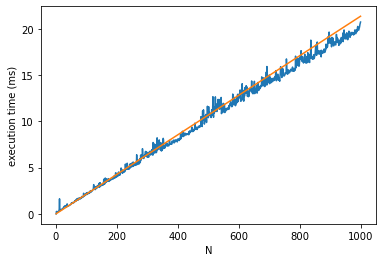

In [14]:
A = np.matrix([
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # 0
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],  # 1
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],  # 2
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],  # 3
    [0, 1, 0, 0, 0, 1, 0, 1, 0, 0],  # 4
    [0, 0, 1, 0, 1, 0, 1, 0, 1, 0],  # 5
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],  # 6
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],  # 7
    [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],  # 8
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],  # 9
])

omega_1 = np.ones((10,1), dtype=int)

def dialer_problem(S, N):
    if N == 1:
        return 1
    _A = np.identity(10, dtype=int)
    for i in range(N-1):
        _A = _A*A
    _A = _A*omega_1
    return int(_A[S][0])

npts = 1000
times = []
x = [i for i in range(1, npts)]
for n in range(1, npts):
    s = random.randint(0, 9)
    tt = timeit.timeit('dialer_problem(s, n)', 'from __main__ import dialer_problem, s, n', number=4)
    times.append((tt, s, n))

y = np.array([(q[0]*1e3) for q in times])

# linear fit of y
fit = np.polyfit(x, y, 2)
b = fit[0] # intercept
m = fit[1] # slope
y1 = np.array([m*q for q in x])

plt.plot(x, y)
plt.plot(x, y1)
plt.ylabel('execution time (ms)')
plt.xlabel('N')
plt.show()

### (g)  how long (ms) to run part d algorithm if N=1e7?

In [15]:
#  use result from polyfit
t = int(m*1e7 + b)
t

213813

### (h)  write a decimal to binary function

In [16]:
def dec2bin(d, msbfirst=True):
    blist = [int((d & 1 << q)/2**q) for q in range(math.ceil(math.log2(d)))]
    if msbfirst:
        return blist[::-1]
    else:
        return blist
print(dec2bin(22))

[1, 0, 1, 1, 0]


### (i)  improve matrix multiply by using precomputed multiplication factors

18713


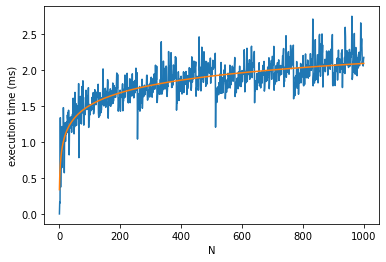

In [17]:
def mpower(A, n):
    'matrix multiply'
    I = np.identity(10, dtype=int)
    ba = dec2bin(n, msbfirst=False)
    precompute = []
    precompute = [A]
    for i in range(1, len(ba)):
        precompute.append(precompute[i-1]*precompute[i-1])
    _A = I
    for (i, b) in enumerate(ba):
        if b == 1:
            _A = _A*precompute[i]
    return _A


def dialer_problem(S, N):
    if N == 1:
        return 1
    global A
    global omega_1
    _A = mpower(A, N-1)
    _A = _A*omega_1
    return int(_A[S][0])

print(dialer_problem(5, 10))

npts = 1000
times = []
x = [i for i in range(1, npts)]

for n in range(1, npts):
    s = random.randint(0, 9)
    tt = timeit.timeit('dialer_problem(s, n)', 'from __main__ import dialer_problem, s, n', number=20)
    times.append((tt, s, n))

y = np.array([(q[0]*1e3) for q in times])

# logx fit
fit = np.polyfit(np.log(x), y, 1)
y1 = np.array([(fit[0]*math.log(q) + fit[1]) for q in x])
plt.plot(x, y)
plt.plot(x, y1)
plt.ylabel('execution time (ms)')
plt.xlabel('N')
plt.show()

### (k)  how long to run part d algorithm if N=10e7?

In [18]:
#  use result from polyfit
print(fit[0])
print(fit[1])
t = fit[0]*math.log(10e7) + fit[1]
t

0.2540921249389496
0.3402272216555169


5.020777134708365

## Problem 2

### (a)  covariance matrix

In [19]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

In [20]:
D = np.array([
    [1.72, 0.10],
    [-0.58, 0.31],
    [1.99, 1.54],
    [1.60, 4.97],
    [2.72, 2.43],
    [2.83, 3.59],
    [5.95, 7.71],
    [4.75, 7.63],
    [5.57, 5.60],
    [9.82, 7.91],
])

C = np.cov(D.T)
C

array([[8.70742333, 7.41923   ],
       [7.41923   , 9.21336556]])

### (b)  find eigenvalues and corresponding eigenvectors for the covariance matrix.
name the eigenvector with the most variance v.

In [21]:
EVAL, EVEC = np.linalg.eig(C)
print('EVAL', EVAL)
print('EVEC', EVEC)

v = EVEC.T[np.argmax(EVAL)].T
v

EVAL [ 1.53685296 16.38393593]
EVEC [[-0.71905385 -0.69495436]
 [ 0.69495436 -0.71905385]]


array([-0.69495436, -0.71905385])

### (c)  use the dot product of matrix D and v to map all the data points to a direction which corresponds to the most variance.

In [22]:
D_1 = np.matmul(D, v)
print("D_1", D_1)

D_1 [ -1.26722688   0.18016683  -2.4903021   -4.68562461  -3.63757671
  -4.54812416  -9.67888362  -8.78741408  -7.89759734 -12.51216776]


### plots

In [23]:
# orthogonal eigenvector for plotting
imin = np.argmin(EVAL)
vv = (EVEC.T[imin])

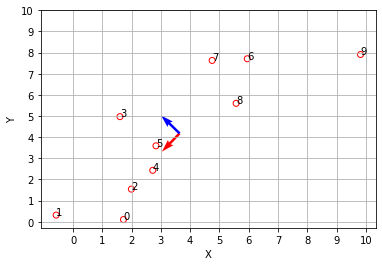

In [24]:
fig, ax = plt.subplots()
ax.scatter(D[:,0], D[:,1], facecolors='none', edgecolors='r')
for i in range(len(D)):
    ax.annotate('%d' % i, (D[i][0], D[i][1]))
xbar = np.mean(D[:,0])
ybar = np.mean(D[:,1])
vscale=1/(np.sqrt(v[0]**2 + v[1]**2))
vvscale=1/(np.sqrt(vv[0]**2 + vv[1]**2))
ax.quiver(xbar, ybar, v[0], v[1], scale=vscale, scale_units='xy', color='r')
ax.quiver(xbar, ybar, vv[0], vv[1], scale=vvscale, scale_units='xy', color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks(np.arange(0, len(D)+1))
plt.yticks(np.arange(0, len(D)+1))
plt.grid(True)
plt.show()

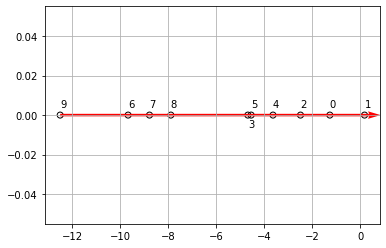

In [25]:
fig, ax = plt.subplots()
ax.scatter(D_1, [0. for i in range(len(D_1))], facecolors='none', edgecolors='k')
for i in range(len(D_1)):
    if i == 3:
        ax.annotate('%d' % i, (D_1[i], 0.), xytext=(D_1[i], -0.006))
    else:
        ax.annotate('%d' % i, (D_1[i], 0.), xytext=(D_1[i], 0.004))
ax.quiver(np.min(D_1), 0., np.max(D_1)-np.min(D_1), 0., scale=0.95, scale_units='xy', color='r')
plt.grid(True)
plt.show()